<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin_Lukan_Seaborn_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


# You have now a DataFrame with lots of weather data

In [35]:
df_weather['DATE']=pd.to_datetime(df_weather['DATE'])
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

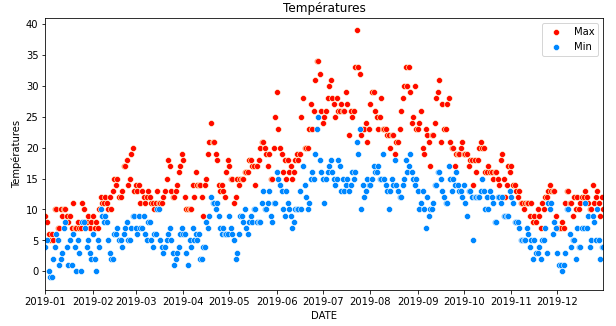


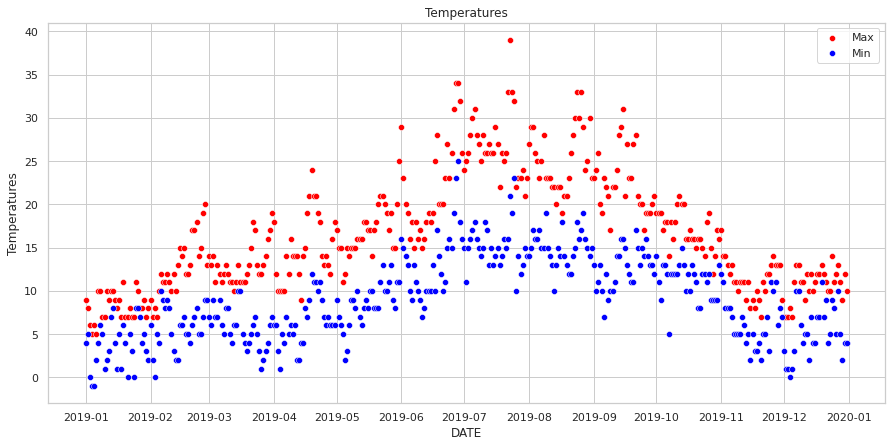

In [53]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
fig=plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
sns.set_style('white')
sns.scatterplot(data=df_weather,x='DATE',y='MAX_TEMPERATURE_C',color='red')
sns.scatterplot(data=df_weather,x='DATE',y='MIN_TEMPERATURE_C',color='blue')
plt.legend(loc='upper right',labels=['Max','Min'])
ax.set_ylabel('Temperatures')
ax.set_title('Temperatures')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.show()


## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

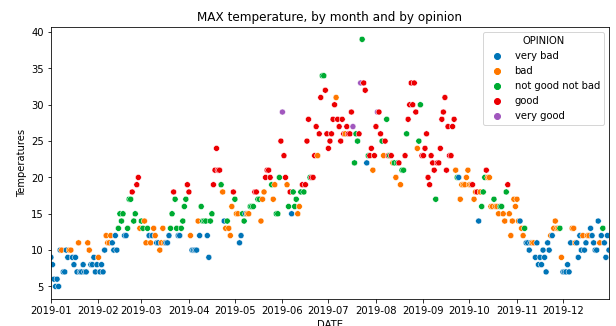

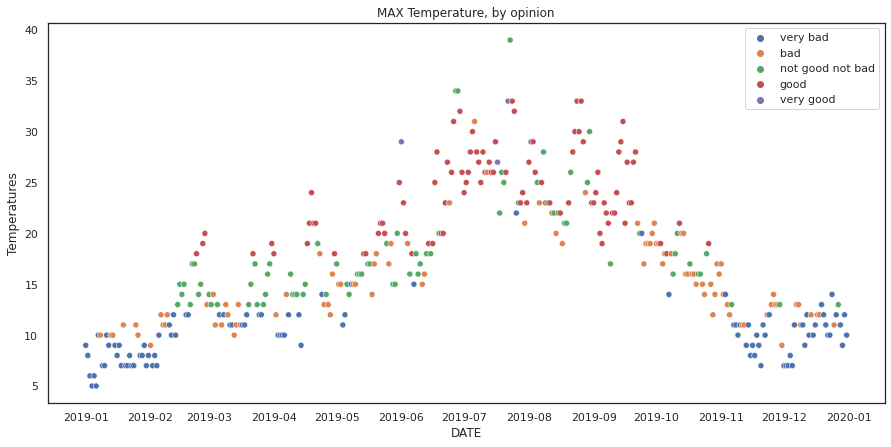

In [54]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
fig=plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
sns.set_style('white')
sns.scatterplot(data=df_weather,x='DATE',y='MAX_TEMPERATURE_C',hue='OPINION')
plt.legend(loc='upper right')
ax.set_ylabel('Temperatures')
ax.set_title('MAX Temperature, by opinion')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.show()

### It is not plotted "by month", only the major x-ticks are by month!

## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

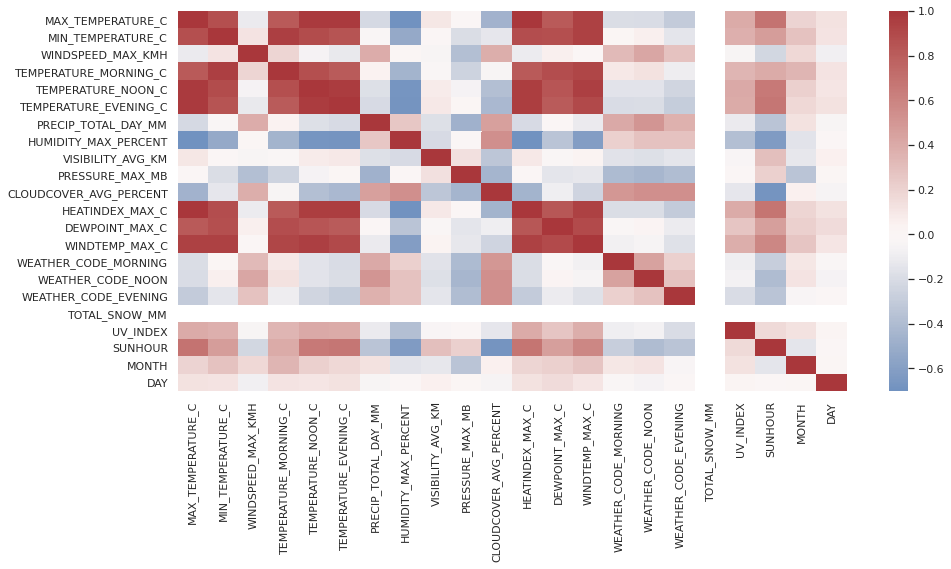

In [58]:
# It's your turn now :

sns.heatmap(df_weather.corr(),cmap='vlag',center=0)
plt.show()


## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


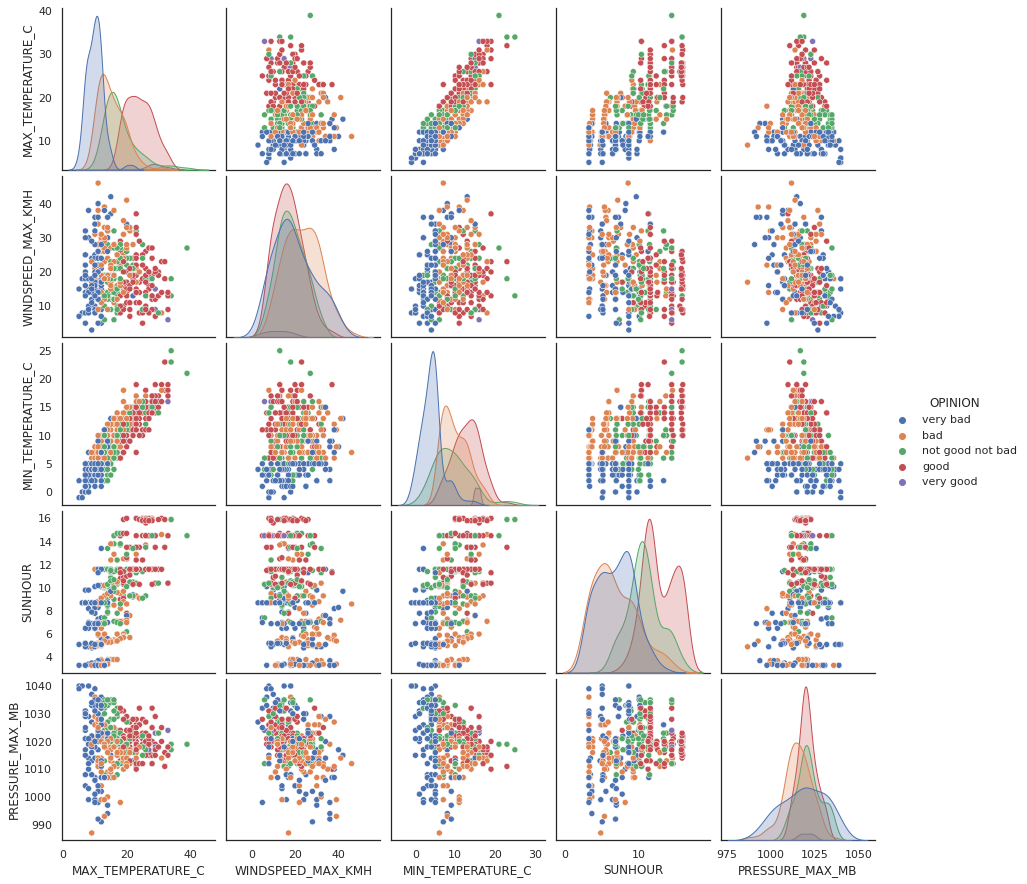

In [71]:
# It's your turn:
sns.pairplot(df_weather[['MAX_TEMPERATURE_C','WINDSPEED_MAX_KMH','MIN_TEMPERATURE_C','SUNHOUR','PRESSURE_MAX_MB','OPINION']],hue='OPINION')

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


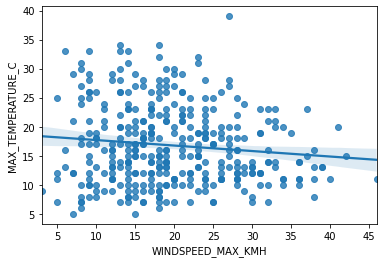

In [ ]:

sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()


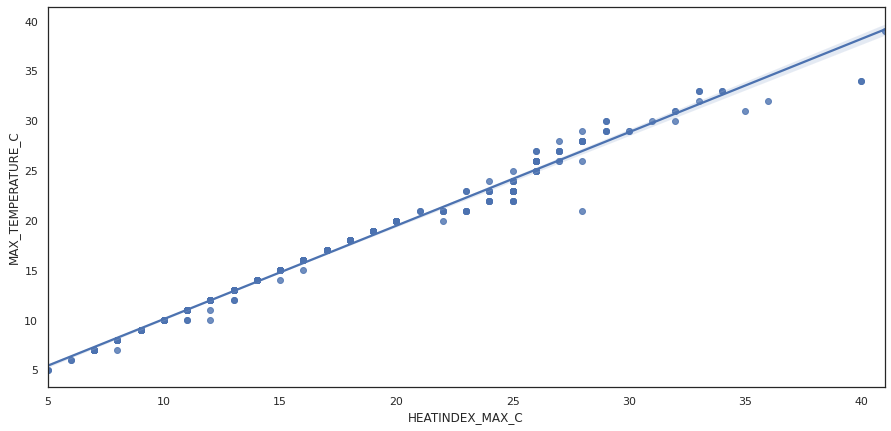

In [64]:
# Display a regplot with a positive correlation:
sns.regplot(data = df_weather,x='HEATINDEX_MAX_C', y='MAX_TEMPERATURE_C')
plt.show();

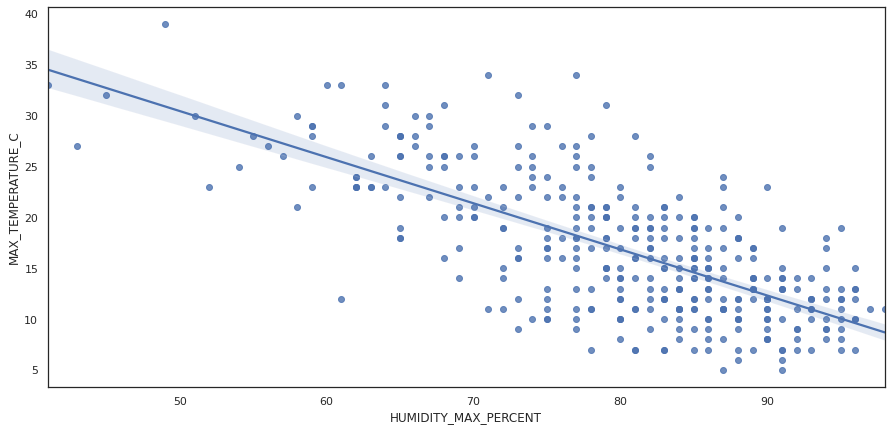

In [65]:
# Display a regplot with a negative correlation:
sns.regplot(data=df_weather,x='HUMIDITY_MAX_PERCENT', y='MAX_TEMPERATURE_C')
plt.show()

# More and more...
Draw 4 different charts of your choice (you're an analyst, you have to be force of proposal), on the same figure, to represent which season has better weather.

In [ ]:
by_weeks=df_weather.groupby(df_weather.DATE.dt.strftime('%W')).mean()
by_weeks

In [119]:
by_weeks['OPINION']=round(by_weeks['OPINIONS'],ndigits=0).replace([-2,-1,0,1,2],['very bad','bad','not good not bad','good','very good'])

In [128]:
[i for i in range(1,52,4)]

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49]

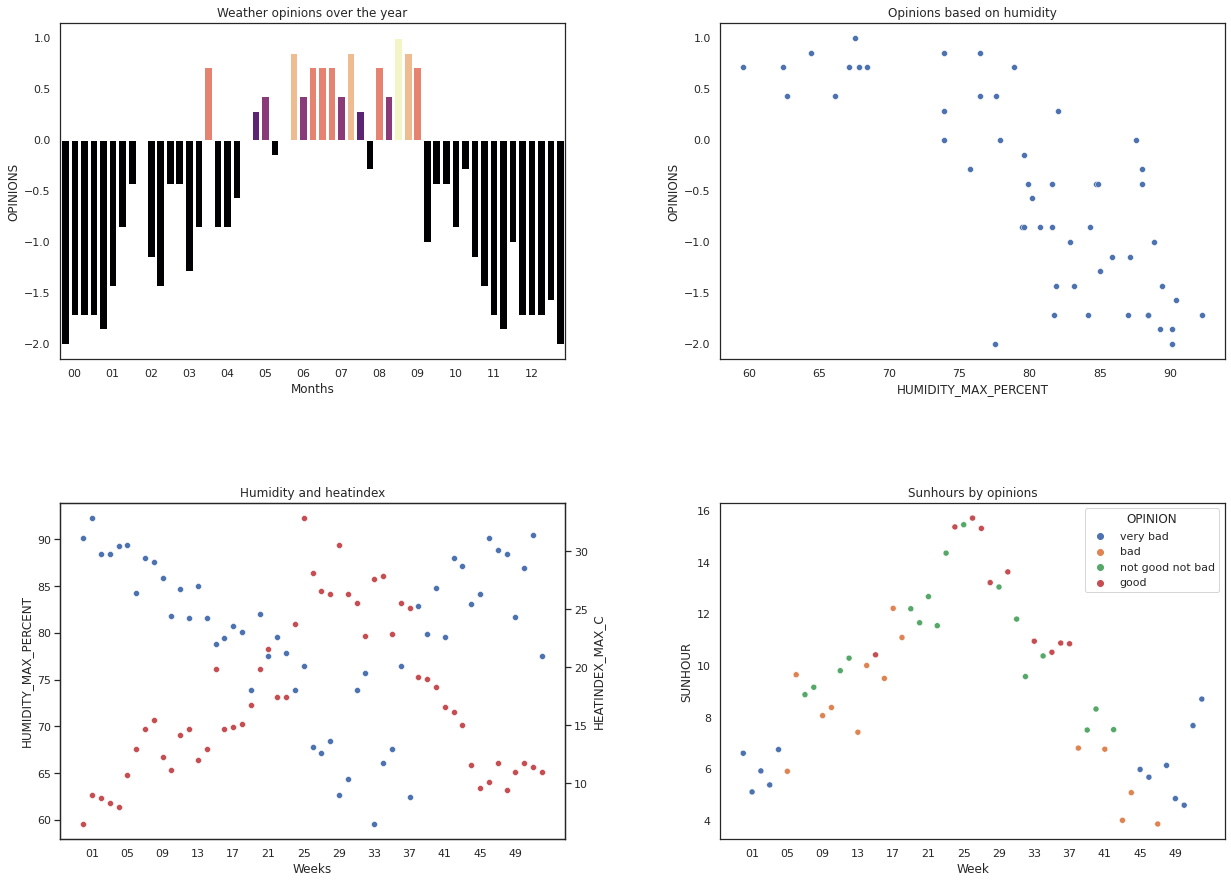

In [161]:
# Your code here

# Visualize support vectors vs sepal data
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d')
from scipy.ndimage.filters import gaussian_filter1d

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20, 15))
fig.tight_layout(pad=10.0)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax1=plt.subplot(2,2,1)
sns.barplot(ax=ax1,x=by_weeks.index.values,y=by_weeks['OPINIONS'],palette=plt.cm.magma(by_weeks['OPINIONS']))
ax1.set_xticks(ticks, minor=False)
ax1.set_title('Weather opinions over the year')
ax1.set_xlabel('Months')

ax2=plt.subplot(2,2,2)
sns.scatterplot(ax=ax2,data=by_weeks,x='HUMIDITY_MAX_PERCENT',y='OPINIONS')
ax2.set_title('Opinions based on humidity')

ax3=plt.subplot(2,2,3)
ax4=ax3.twinx()
sns.scatterplot(ax=ax3,data=by_weeks,x='DATE',y='HUMIDITY_MAX_PERCENT',color='b')
sns.scatterplot(ax=ax4,data=by_weeks,x='DATE',y='HEATINDEX_MAX_C',color='r')

#ax3.legend(loc='upper right',labels=['min','max'])
ax3.set_title('Humidity and heatindex')
ax3.set_xticks(ticks, minor=False)
ax3.set_xlabel('Weeks')


ax5=plt.subplot(2,2,4)
sns.scatterplot(ax=ax5,data=by_weeks,x=by_weeks.index.values,y='SUNHOUR',hue='OPINION')
ax5.set_title('Sunhours by opinions')
ax5.set_xticks(ticks, minor=False)
ax5.set_xlabel('Week')

plt.show();

# Is it summer? It seems appropriate. :) 